In [1]:
# task : 2d detection

In [1]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm
from glob import glob
from PIL import Image

In [4]:
data_dir = '/workspace/traffic_light/data/detection/train'
img_path = f'{data_dir}/images'
labels_path = f'{data_dir}/labels'

# YOLO format 시각화

In [5]:
# 0 ~ 26863 의 모든 label이 있는지 확인.
# file_names = os.listdir(img_dir)
# mapping = [0]*26880
# cnt = 0
# for name_format in file_names:
#     name = name_format.split('.jpg')[0]
#     print(f'name: {name}')
#     cnt +=1
#     if mapping[int(name)] == 0:
#         mapping[int(name)] = 1
# for i, b in enumerate(mapping):
#     if b == 0:
#         print(i, ' ')
# print(f"cnt : {cnt}")

# file_names = sorted(os.listdir(img_dir))
# print(file_names)
# len(file_names)

In [6]:
df = pd.DataFrame({
    'file_name': [],
    'class_id': [],
    'norm_center_x': [],
    'norm_center_y': [],
    'norm_w': [],
    'norm_h': [],
    'original_w': [],
    'original_h': [],
})

In [7]:
file_names = sorted(os.listdir(labels_path))

# file names : [... ,'00000036.txt', '00000037.txt', ...]
# file_name : '00000036.txt'
# name : '00000036'
cnt = 0
for file_name in tqdm(file_names):
    name = file_name.split('.txt')[0]
    with open(os.path.join(labels_path,file_name), 'r') as file:
        with Image.open(os.path.join(img_path, f"{name}.jpg")) as img:
            original_w, original_h = img.size
        for line in file:
            class_id, norm_center_x, norm_center_y, norm_w, norm_h = line.strip().split()
            
            df.loc[cnt] = [
                name,
                int(class_id), 
                float(norm_center_x), 
                float(norm_center_y), 
                float(norm_w), 
                float(norm_h),
                original_w,
                original_h
            ]
            cnt += 1

print(df.head())
print(df.info())

  0%|          | 0/24178 [00:00<?, ?it/s]

100%|██████████| 24178/24178 [01:31<00:00, 264.25it/s]

  file_name  class_id  norm_center_x  norm_center_y    norm_w    norm_h  \
0  00000000         3       0.544141       0.350000  0.010156  0.012500   
1  00000000         3       0.559375       0.346875  0.010937  0.010417   
2  00000001         3       0.518750       0.334375  0.010937  0.010417   
3  00000001         3       0.534375       0.333333  0.010937  0.012500   
4  00000002         3       0.499609       0.317708  0.010156  0.010417   

   original_w  original_h  
0        1280         480  
1        1280         480  
2        1280         480  
3        1280         480  
4        1280         480  
<class 'pandas.core.frame.DataFrame'>
Index: 78368 entries, 0 to 78367
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   file_name      78368 non-null  object 
 1   class_id       78368 non-null  int64  
 2   norm_center_x  78368 non-null  float64
 3   norm_center_y  78368 non-null  float64
 4   norm_w   

In [21]:
# train ->List[file_name]
# x_max > orign w :  [276, 561, 566, 16619, 17988, 26798]
# y_max > orign h :  [22706, 26573]
# x_min < 0:  [5177, 6733, 12059, 13632, 20671, 21533]
# y_min < 0:  [5225, 10205, 10205]

# val ->List[file_name]
# x_max > orign w :  [3502, 3503, 3504, 3505, 3506, 8360, 23155]
# y_max > orign h :  [4767, 4767, 4768, 4769, 4770, 4770, 4774, 4774, 4789]
# x_min < 0:  [25320]
# y_min < 0:  [23082]

In [53]:
x_max_list, y_max_list, x_min_list, y_min_list = [], [], [], []
total = []
for i in range(len(df)):
    file_name, class_id, norm_center_x, norm_center_y, norm_w, norm_h, original_w, original_h = df.iloc[i]
    file_name = int(file_name)
    x_min = (norm_center_x - norm_w/2) * original_w
    y_min = (norm_center_y - norm_h/2) * original_h
    w = norm_w * original_w
    h = norm_h * original_h
    x_max = x_min + w
    y_max = y_min + h
    
    if x_min < 0:
        # print(f"index: {file_name}, x_min: {x_min}, norm_center_x: {norm_center_x}, norm_w/2: {norm_w/2} ")
        x_min_list.append(file_name)
        
    if y_min < 0:
        # print(f"index: {file_name}, y_min: {y_min}, norm_center_y: {norm_center_y}, norm_h/2: {norm_h/2} ")
        y_min_list.append(file_name)
    if x_max > original_w:
        # print(f"index: {file_name}, x_max: {x_max}")
        x_max_list.append(file_name)
    if y_max > original_h:
        # print(f"index: {file_name}, y_max: {y_max}")
        y_max_list.append(file_name)
print("x_max_list: ",x_max_list)
print("y_max_list: ",y_max_list)
print("x_min_list: ",x_min_list) 
print("y_min_list: ",y_min_list)
total.extend(x_min_list)
total.extend(x_max_list)
total.extend(y_min_list)
total.extend(y_max_list)
print("전체개수:",len(set(total)))
print(total)


x_max_list:  [3502, 3503, 3504, 3505, 3506, 8360, 23155]
y_max_list:  [4767, 4767, 4768, 4769, 4770, 4770, 4774, 4774, 4789]
x_min_list:  [25320]
y_min_list:  [23082]
전체개수: 15
[25320, 3502, 3503, 3504, 3505, 3506, 8360, 23155, 23082, 4767, 4767, 4768, 4769, 4770, 4770, 4774, 4774, 4789]


In [6]:
def bbox_yolo2coco(ann):
    file_name, class_id, norm_center_x, norm_center_y, norm_w, norm_h, original_w, original_h = ann
    x = (norm_center_x - norm_w/2) * original_w
    y = (norm_center_y - norm_h/2) * original_h
    w = norm_w * original_w
    h = norm_h * original_h
    return [x, y, w, h]
    
def get_img(filename):
    for img in data['images']:
        if img['file_name'] == 'train/'+filename:
            return img


def get_img_ann(image_id):
    img_ann = []
    isFound = False
    for ann in data['annotations']:
        if ann['image_id'] == image_id:
            img_ann.append(ann)
            isFound = True
    if isFound:
        return img_ann
    else:
        return print(image_id)

In [7]:
import random
import cv2
import os

# BOX_COLOR = [(255, 0, 0), (0, 50, 0), (0, 0, 255), (184, 134, 11), (255, 0, 255), (0, 139, 139),
#              (128, 0, 0), (0, 128, 0), (0, 0, 128), (128, 128, 128)]
BOX_COLOR = [
    (255, 20, 147),  # Fluorescent Pink
    (57, 255, 20),   # Fluorescent Green
    (255, 255, 51),  # Fluorescent Yellow
    (255, 102, 0),   # Fluorescent Orange
    (0, 204, 255),   # Fluorescent Blue
    (160, 32, 240),  # Fluorescent Purple
    (255, 0, 255),   # Fluorescent Magenta
    (0, 255, 255),   # Fluorescent Cyan
    (255, 69, 0),    # Fluorescent Red-Orange
    (0, 255, 127),   # Fluorescent Spring Green
    (255, 105, 180), # Fluorescent Hot Pink
    (255, 20, 147),  # Fluorescent Light Pink
    (173, 255, 47),  # Fluorescent Green-Yellow
    (0, 0, 0)  # Fluorescent black (not truly fluorescent, but distinct)
]

TEXT_COLOR = (0, 0, 0)


        
def visualize_bbox(img, bbox, class_name, color, idx, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    
    ((text_width, text_height), _) = cv2.getTextSize(class_name + f' {str(idx)}', cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), color, -1)
    cv2.putText(
        img,
        text=class_name + f' {str(idx)}',
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for idx, (bbox, category_id) in enumerate(zip(bboxes, category_ids)):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, BOX_COLOR[category_id], idx)
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

6457


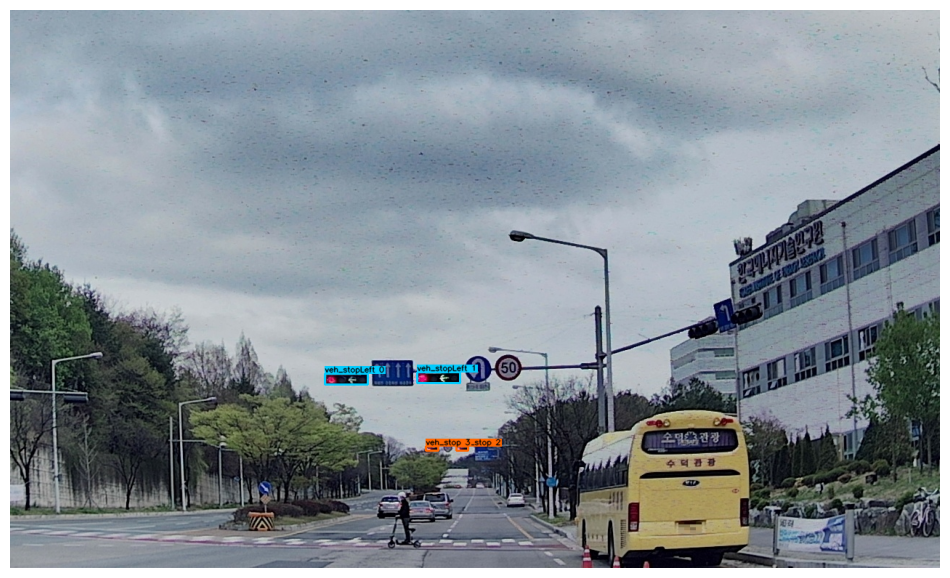

In [22]:
import random

# Generate a random integer between 0 and 26863
random_integer = random.randint(0, int(df.iloc[-1]["file_name"]))
print(random_integer)

file_name = str(random_integer).zfill(8)
# print("file_file : ", file_name)
# print(df[df["file_name"]==file_name])

bboxes = []
category_ids = []
for index, ann in df[df["file_name"]==file_name].iterrows():
    bboxes.append(bbox_yolo2coco(ann))
    category_ids.append(ann['class_id'])

img_BGR = cv2.imread(os.path.join(img_path, f'{file_name}.jpg'), cv2.IMREAD_COLOR)
img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

# 시각화 실행 코드
category_id_to_name = {
    0: 'veh_go',
    1: 'veh_goLeft',
    2: 'veh_noSign',
    3: 'veh_stop',
    4: 'veh_stopLeft',
    5: 'veh_stopWarning',
    6: 'veh_warning',
    7: 'ped_go',
    8: 'ped_noSign',
    9: 'ped_stop',
    10: 'bus_go',
    11: 'bus_noSign',
    12: 'bus_stop',
    13: 'bus_warning'
}
visualize(img, bboxes, category_ids, category_id_to_name)


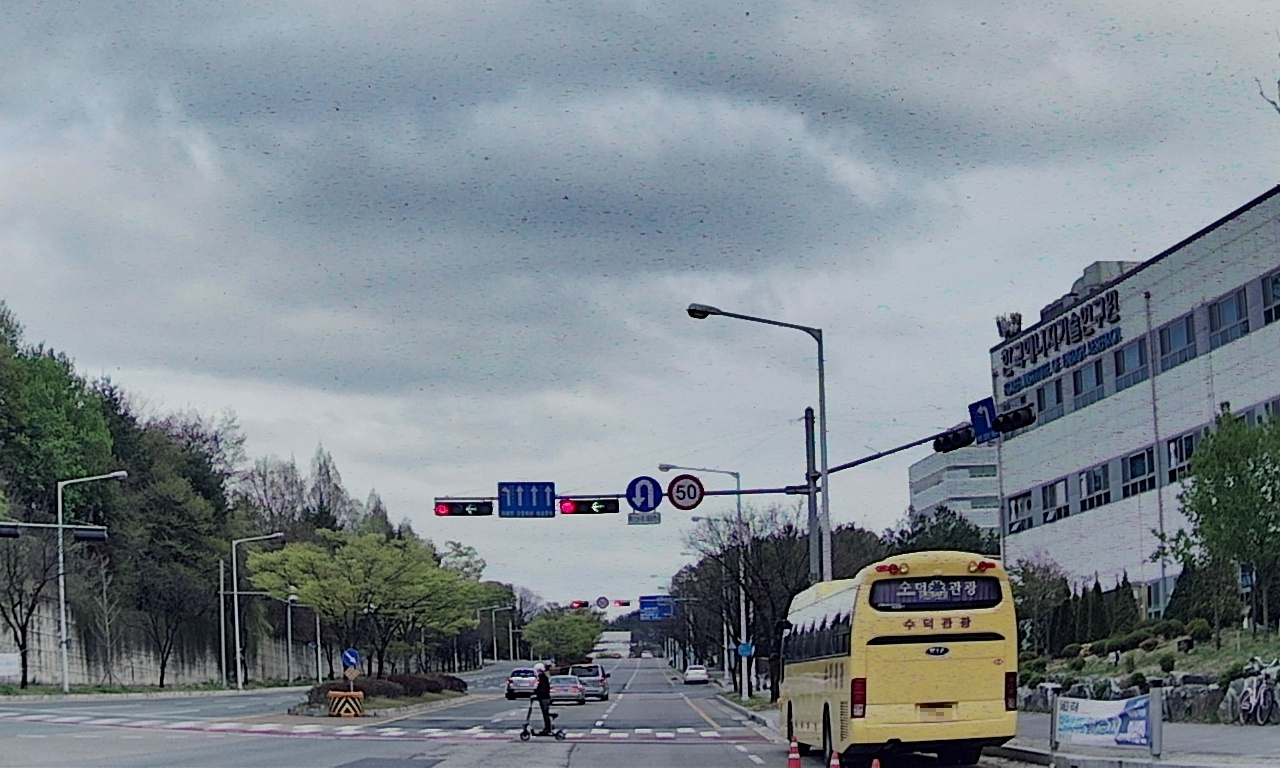

In [23]:
from PIL import Image
img = Image.open(os.path.join(img_path, f'{file_name}.jpg'))
img

# Convert YOLO format to coco format
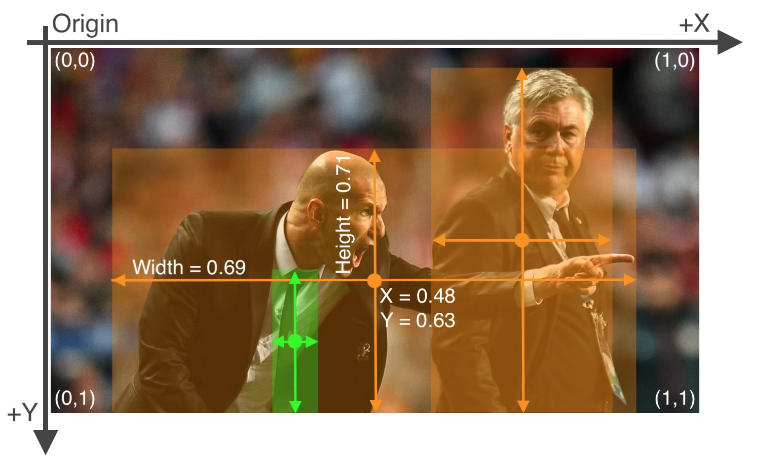

coco는 왼쪽 상단이 0이고, x,y는 경계상자의 왼쪽상단을 의미

In [111]:
categories = [
    {"id": 0, "name": "veh_go", "supercategory": "veh_go"},
    {"id": 1, "name": "veh_goLeft", "supercategory": "veh_goLeft"},
    {"id": 2, "name": "veh_noSign", "supercategory": "veh_noSign"},
    {"id": 3, "name": "veh_stop", "supercategory": "veh_stop"},
    {"id": 4, "name": "veh_stopLeft", "supercategory": "veh_stopLeft"},
    {"id": 5, "name": "veh_stopWarning", "supercategory": "veh_stopWarning"},
    {"id": 6, "name": "veh_warning", "supercategory": "veh_warning"},
    {"id": 7, "name": "ped_go", "supercategory": "ped_go"},
    {"id": 8, "name": "ped_noSign", "supercategory": "ped_noSign"},
    {"id": 9, "name": "ped_stop", "supercategory": "ped_stop"},
    {"id": 10, "name": "bus_go", "supercategory": "bus_go"},
    {"id": 11, "name": "bus_noSign", "supercategory": "bus_noSign"},
    {"id": 12, "name": "bus_stop", "supercategory": "bus_stop"},
    {"id": 13, "name": "bus_warning", "supercategory": "bus_warning"}
]

coco_dataset = {
    "info": {
        "year": 2024, 
        "version": "1.0.0", 
        "description": "traffic light", 
        "contributor": "tlfromj", 
        "url": "", 
        "date_created": "2024-10-02 21:00:00",
    },
    "licenses": [{
        "id": 0, 
        "name": None, 
        "url": None,
    }],
    "categories": categories,
    "images": [],
    "annotations": []
}

def converter_yolo2coco(output_dir):
    anno_dicts = []
    for i in tqdm(range(len(df))):
        file_name, class_id, norm_center_x, norm_center_y, norm_w, norm_h, original_w, original_h = df.loc[i]
        
        image_dict = {
            "id": int(file_name),
            "width": int(original_w),
            "height": int(original_h),
            "file_name": f"{file_name}.jpg", # train/file_name.jpg
            "license": 0,
            "flickr_url": None,
            "coco_url": None,
            "date_captured": None,
        }
        
        coco_dataset["images"].append(image_dict)
        
        anno_dict = {
            "id": i,
            "image_id": int(file_name),
            "category_id": int(class_id),
            "area": float(norm_w * norm_h * original_w * original_h),
            "bbox": bbox_yolo2coco(df.loc[i]),
            "iscrowd": 0
        }
        anno_dicts.append(anno_dict)
    
    coco_dataset["annotations"].extend(anno_dicts)

    # make coco_datset.json
    with open(os.path.join(output_dir, 'annotations.json'), 'w') as f:
        json.dump(coco_dataset, f)



In [112]:
output_dir = data_dir
converter_yolo2coco(output_dir)

  0%|          | 0/87617 [00:00<?, ?it/s]

In [110]:
# Read the JSON file
with open(os.path.join(output_dir, 'annotations.json'), 'r') as f:
    data = json.load(f)
    print(data['annotations'][0])

{'segmentation': [[510.66, 423.01, 511.72, 420.03, 510.45, 416.0, 510.34, 413.02, 510.77, 410.26, 510.77, 407.5, 510.34, 405.16, 511.51, 402.83, 511.41, 400.49, 510.24, 398.16, 509.39, 397.31, 504.61, 399.22, 502.17, 399.64, 500.89, 401.66, 500.47, 402.08, 499.09, 401.87, 495.79, 401.98, 490.59, 401.77, 488.79, 401.77, 485.39, 398.58, 483.9, 397.31, 481.56, 396.35, 478.48, 395.93, 476.68, 396.03, 475.4, 396.77, 473.92, 398.79, 473.28, 399.96, 473.49, 401.87, 474.56, 403.47, 473.07, 405.59, 473.39, 407.71, 476.68, 409.41, 479.23, 409.73, 481.56, 410.69, 480.4, 411.85, 481.35, 414.93, 479.86, 418.65, 477.32, 420.03, 476.04, 422.58, 479.02, 422.58, 480.29, 423.01, 483.79, 419.93, 486.66, 416.21, 490.06, 415.57, 492.18, 416.85, 491.65, 420.24, 492.82, 422.9, 493.56, 424.39, 496.43, 424.6, 498.02, 423.01, 498.13, 421.31, 497.07, 420.03, 497.07, 415.15, 496.33, 414.51, 501.1, 411.96, 502.06, 411.32, 503.02, 415.04, 503.33, 418.12, 501.1, 420.24, 498.98, 421.63, 500.47, 424.39, 505.03, 423.32